(858.5, 963.5)


/home/marina/_notebook/lib/python2.7/site-packages/IPython/kernel/__main__.py:48: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


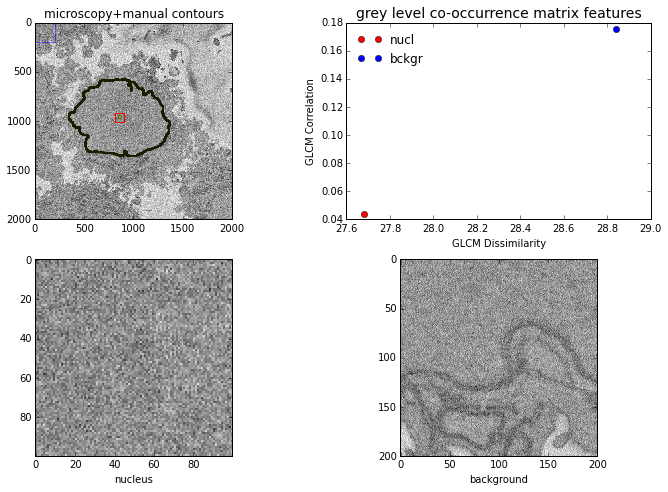

In [16]:
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
import tifffile
import numpy as np
import os, glob

import pandas as pd

import matplotlib.patches as patches
%matplotlib inline


fcroot =  os.path.expanduser('~') + '/_FrancisCrickProject/'

contour = tifffile.imread(fcroot + 'ROI_1656-6756-329_manual/ROI_1656-6756-329_z0090.tif')
#print np.histogram(contour)
nz = np.nonzero(contour > 0)
C = (min(nz[1]) + (max(nz[1]) - min(nz[1]))/2.0,\
     min(nz[0]) + (max(nz[0] - min(nz[0])))/2.0)
print C


#print contour[max(highs)]
#print contour[min(highs)]

# open example single cell image
image = tifffile.imread(fcroot + '/ROI_1656-6756-329/ROI_1656-6756-329_z0090.tiff')


X = image.shape[0]
Y = image.shape[1]
STEP = 50

PATCH_SIZE = 100


# select some patches from nucleus areas of the image
'''
nuc_locations = [(C[0] - STEP, C[1] - STEP), (C[0] - STEP, C[1] + STEP), \
                 (C[0] + STEP, C[1] - STEP), (C[0] + STEP, C[1] + STEP)]
print nuc_locations
'''

nuc_locations = [(C[0] - PATCH_SIZE/2.0, C[1] - PATCH_SIZE/2.0)]

nuc_patches = []
for loc in nuc_locations:
    nuc_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

'''    
# select some patches from sky areas of the image
bac_locations = [(1000, 1750), (1350, 350), (1800, 1200), (500, 330)]
'''
bac_locations = [(0, 0)]
bac_patches = []
for loc in bac_locations:
    bac_patches.append(image[loc[0]:loc[0] + PATCH_SIZE*2,
                             loc[1]:loc[1] + PATCH_SIZE*2])

# compute some GLCM properties each patch
xs = []
ys = []
for patch in (nuc_patches + bac_patches):
    glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

# create the figure
fig = plt.figure(figsize=(12, 12))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest', vmin=0, vmax=255)
#for (x, y) in nuc_locations:
#    ax.plot(x + PATCH_SIZE / 2.0, y + PATCH_SIZE / 2.0, 'rs')

# coordinates, width, height
ax.add_patch(patches.Rectangle((nuc_locations[0][0], nuc_locations[0][1]), PATCH_SIZE, PATCH_SIZE,\
                               fill=False, color='red'))

# coordinates, width, height
ax.add_patch(patches.Rectangle((bac_locations[0][0], bac_locations[0][1]), PATCH_SIZE*2, PATCH_SIZE*2,\
                               fill=False, color='blue', alpha=0.5))



ax.set_title('microscopy+manual contours')
#ax.set_xticks([])
#ax.set_yticks([])
ax.axis('image')

ax.plot(C[0], C[1], 'yo', markersize=3)
ax.plot(nz[1], nz[0], 'yo', markersize=0.5, linewidth = 1)


# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(nuc_patches)], ys[:len(nuc_patches)], 'ro', label='nucl')
ax.plot(xs[len(bac_patches):], ys[len(bac_patches):], 'bo', label='bckgr')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.set_title('grey level co-occurrence matrix features', fontsize=14)
ax.legend(loc=2, frameon=False)


# display the image patches
for i, patch in enumerate(nuc_patches + bac_patches):
    ax = fig.add_subplot(3, len(nuc_patches + bac_patches), len(nuc_patches + bac_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, interpolation='nearest',
              vmin=0, vmax=255)
    if i == 0:
        ax.set_xlabel('nucleus')
    else:
        ax.set_xlabel('background')
    #ax.set_xlabel('nucl %d' % (i + 1))

    '''
for i, patch in enumerate(bac_patches):
    ax = fig.add_subplot(3, len(bac_patches), len(bac_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, interpolation='nearest',
              vmin=0, vmax=255)
    ax.set_xlabel('C[0] - 100, C[1]-100), (C)bckgr %d' % (i + 1))
'''

# display the patches and plot
#fig.suptitle('Grey level co-occurrence matrix features', fontsize=14)
plt.show()
fig.savefig(fcroot + 'texture_example_z90.png', dpi=200, bbox_inches='tight')